In [23]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib as mpl
import collections
import matplotlib.pyplot as plt
from matplotlib import colors
import pylab as plt

import numpy as np
from scipy import stats
import datetime

from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
import statsmodels.api as sm


%matplotlib inline


import scipy.stats as stats

import sklearn
import statsmodels.api as sm

from scipy.stats import mode

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [3]:
data1 = pd.read_csv(r'/Users/Supreetha/Downloads/UsedCarMaster.csv')
df1 = data1.dropna(subset=['maker'])

In [4]:
data1.head()

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,color_slug,stk_year,transmission,door_count,seat_count,fuel_type,date_created,date_last_seen,price_eur
0,ford,galaxy,151000.0,2011.0,2000.0,103.0,NaN,NaN,None,man,5,7,diesel,2015-11-14 18:10:06.838319+00,2016-01-27 20:40:15.46361+00,10584.75
1,skoda,octavia,143476.0,2012.0,2000.0,81.0,NaN,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.853411+00,2016-01-27 20:40:15.46361+00,8882.31
2,bmw,NaN,97676.0,2010.0,1995.0,85.0,NaN,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.861792+00,2016-01-27 20:40:15.46361+00,12065.06
3,skoda,fabia,111970.0,2004.0,1200.0,47.0,NaN,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.872313+00,2016-01-27 20:40:15.46361+00,2960.77
4,skoda,fabia,128886.0,2004.0,1200.0,47.0,NaN,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.880335+00,2016-01-27 20:40:15.46361+00,2738.71


In [7]:
data1_subset = data1[['maker', 'model', 'mileage', 'manufacture_year', 'price_eur', 'fuel_type']]

In [8]:
# Preliminary data cleaning 

# 1. Drop all the rows where the manufacture year of the car is lesser than 2010
#    ==> About 110,777 rows were dropped, which was about 10% of the dataset. 
#    (Number of rows Reduced to 937798 from 1048575)

#    A number of rows had their manufactue year as 0.0 and some other number that weren't feasible. 
#    Considering only those cars that were manufactured in the past 18 years would provide a solid
#    data for our predictive models.


data1_subset = data1_subset.drop(data1_subset[data1_subset.manufacture_year < 2010].index)


# 2. Clean up price range: Drop rows where the price is lesser: # of rows reduced to 894790

data1_subset = data1_subset.drop(data1_subset[data1_subset.price_eur < 5000].index)
data1_subset = data1_subset.drop(data1_subset[data1_subset.price_eur > 100000].index)

# 3. Drop rows where the maker is null: Reduced to 4473950
data1_subset['maker'].dropna(inplace=True)
data1_subset['model'].dropna(inplace=True)

data1_subset['maker'] = data1_subset.maker.astype('category')
data1_subset['model'] = data1_subset.model.astype('category')

In [9]:
data1_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 508946 entries, 0 to 1048573
Data columns (total 6 columns):
maker               368656 non-null category
model               265056 non-null category
mileage             499369 non-null float64
manufacture_year    450673 non-null float64
price_eur           508946 non-null float64
fuel_type           508946 non-null object
dtypes: category(2), float64(3), object(1)
memory usage: 20.9+ MB


In [10]:
# Used 37 unique makers
maker_list = data1_subset['maker'].unique().tolist()
print (len(maker_list))
print(maker_list)

38
['ford', 'skoda', 'bmw', 'kia', nan, 'suzuki', 'rover', 'citroen', 'audi', 'toyota', 'seat', 'hyundai', 'nissan', 'chevrolet', 'opel', 'mercedes-benz', 'volvo', 'fiat', 'honda', 'dodge', 'subaru', 'mitsubishi', 'mazda', 'chrysler', 'porsche', 'jaguar', 'jeep', 'mini', 'lancia', 'lexus', 'smart', 'tesla', 'maserati', 'hummer', 'isuzu', 'lamborghini', 'bentley', 'lotus']


In [11]:
# With 437 different cars
model_list = data1_subset['model'].unique().tolist()
print (len(model_list))

438


In [12]:
max_year = data1_subset['manufacture_year'].max()
min_year = data1_subset['manufacture_year'].min()

In [55]:
# The current data set has the highest number of cars manufactured in 2015. this is in sync with the real world where
# the year 2015 had the highest number of cars manufactured.
# [Reference] : https://www.washingtonpost.com/business/economy/us-car-sales-hit-record-high-in-2015/2016/01/05/363aaf30-af14-11e5-b820-eea4d64be2a1_story.html?noredirect=on&utm_term=.958cb298154d

#Uncomment in the end coz it takes a while to run
#mode(data1_subset['manufacture_year'])



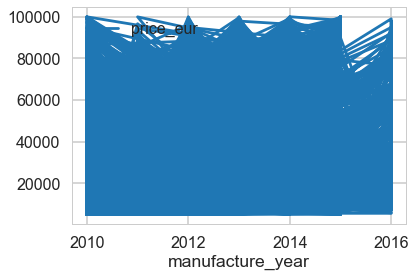

In [13]:
mpl.rcParams['agg.path.chunksize'] = 10000
ax = data1_subset.plot(x="manufacture_year",y="price_eur")

In [14]:
makes_list = ['skoda', 'kia', 'suzuki', 'rover', 'citroen',  'seat', 'opel' ,
                         'volvo', 'fiat', 'dodge', 'subaru', 'mitsubishi',' chrysler', 'jeep',
                         'mini', 'lancia' , 'smart', 'hummer', 'isuzu',  'bentley', 'lotus']
#loc_ = ~data1_subset.model.isin(makes_list)
data1_subset_cleaned = data1_subset.loc[~(data1_subset.maker.isin(makes_list)).values]     
data1_subset_cleaned.drop_duplicates()
data1_subset_cleaned.dropna(inplace = True)
data1_subset_cleaned.shape


#Explain  ---

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


(107377, 6)

In [186]:
# data1_subset_cleaned.hist("manufacture_year", "price_eur", density=True, histtype='bar', stacked=True)
# data1_subset_cleaned.set_title('stacked bar')

In [15]:
price_mileage_df = data1_subset_cleaned[["price_eur", "mileage"]]

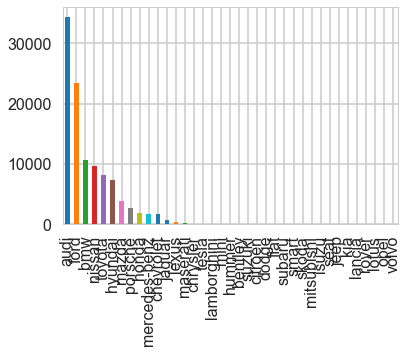

In [16]:
data1_subset_cleaned['maker'].value_counts().plot(kind = 'bar')


Text(0,0.5,'Price')

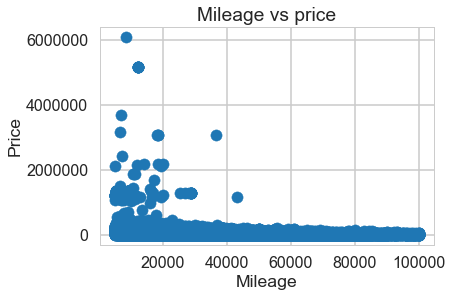

In [17]:
plt.scatter(data1_subset_cleaned['price_eur'],  data1_subset_cleaned['mileage'])
plt.title("Mileage vs price")
plt.xlabel("Mileage")
plt.ylabel("Price")

In [34]:

#tried to get the average price given  fuel type 

#data1_subset_cleaned['fuel_count'] = data1_subset_cleaned['price_eur'].groupby
#(data1_subset_cleaned['fuel_type']).transform('mean')
#plt.plot(data1_subset_cleaned['fuel_type'], data1_subset_cleaned['fuel_count'])




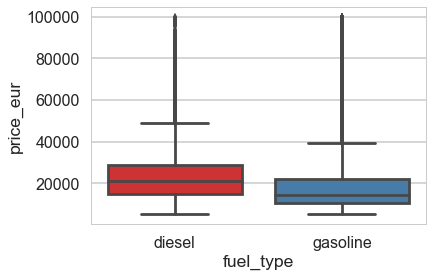

In [19]:
#Shows an even distribution of diesel and gasoline
#plt.scatter(data1_subset_cleaned['fuel_type'],  data1_subset_cleaned['price_eur'])
ax1 = sns.boxplot(x='fuel_type', y = 'price_eur', data = data1_subset_cleaned, palette = "Set1")


In [25]:
data1_subset_cleaned.info()
data1_subset_cleaned['Current Year'] = datetime.datetime.now().year
data1_subset_cleaned['AgeOfCar']=data1_subset_cleaned['Current Year']-data1_subset_cleaned['manufacture_year']
data1_subset_cleaned.info()
data1_subset_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107377 entries, 0 to 1048516
Data columns (total 9 columns):
maker               107377 non-null category
model               107377 non-null category
mileage             107377 non-null float64
manufacture_year    107377 non-null float64
price_eur           107377 non-null float64
fuel_type           107377 non-null object
fuel_count          107377 non-null object
Current Year        107377 non-null int64
AgeOfCar            107377 non-null float64
dtypes: category(2), float64(4), int64(1), object(2)
memory usage: 11.9+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 107377 entries, 0 to 1048516
Data columns (total 9 columns):
maker               107377 non-null category
model               107377 non-null category
mileage             107377 non-null float64
manufacture_year    107377 non-null float64
price_eur           107377 non-null float64
fuel_type           107377 non-null object
fuel_count          107377 non-null object


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,maker,model,mileage,manufacture_year,price_eur,fuel_type,fuel_count,Current Year,AgeOfCar
0,ford,galaxy,151000.0,2011.0,10584.75,diesel,<bound method NDFrame.groupby of 0 10...,2018,7.0
36,ford,focus,159427.0,2012.0,8771.28,diesel,<bound method NDFrame.groupby of 0 10...,2018,6.0
37,ford,galaxy,160235.0,2012.0,11102.89,diesel,<bound method NDFrame.groupby of 0 10...,2018,6.0
46,audi,a8,4000.0,2014.0,98692.30,diesel,<bound method NDFrame.groupby of 0 10...,2018,4.0
53,ford,mondeo,164867.0,2012.0,11102.89,diesel,<bound method NDFrame.groupby of 0 10...,2018,6.0


In [40]:
lm  = LinearRegression()
X = data1_subset_cleaned[['maker', 'model', 'mileage', 'manufacture_year']]
Y = data1_subset_cleaned['price_eur']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [35]:
#Predicts the car price using only the mileage with an accuracy of 99.01%
lm  = LinearRegression()
X = data1_subset_cleaned[['mileage']]
Y = data1_subset_cleaned['price_eur']
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y , test_size = 0.3)
lm.fit(X_train, Y_train)
Y_pred = lm.predict(X_test)

model = sm.OLS(Y_train, X_train)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_eur   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                 1.014e+04
Date:                Tue, 25 Sep 2018   Prob (F-statistic):               0.00
Time:                        20:11:12   Log-Likelihood:            -8.6788e+05
No. Observations:               75163   AIC:                         1.736e+06
Df Residuals:                   75162   BIC:                         1.736e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
mileage        0.0960      0.001    100.717      0.000       0.094       0.098
==============================================================================
Omnibus:                    42370.560   Durbin-Watson:                   0.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         13337478.045
Skew:                          -1.509   Prob(JB):                         0.00
Kurtosis:                      68.189   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
data1_subset_cleaned.info()
data1_subset_cleaned['Current Year'] = datetime.datetime.now().year
data1_subset_cleaned['AgeOfCar']=data1_subset_cleaned['Current Year']-data1_subset_cleaned['manufacture_year']
data1_subset_cleaned.info()
data1_subset_cleaned.head()

In [26]:
#Predicts the car price using only the year of manufacture with an accuracy of 99.20%
lm  = LinearRegression()
X = data1_subset_cleaned[['AgeOfCar']]
Y = data1_subset_cleaned['price_eur']
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y , test_size = 0.3)
lm.fit(X_train, Y_train)
Y_pred = lm.predict(X_test)

model = sm.OLS(Y_train, X_train)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_eur   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                 9.066e+04
Date:                Tue, 25 Sep 2018   Prob (F-statistic):               0.00
Time:                        17:29:34   Log-Likelihood:            -8.4315e+05
No. Observations:               75163   AIC:                         1.686e+06
Df Residuals:                   75162   BIC:                         1.686e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AgeOfCar    3832.6843     12.729    301.097      0.000    3807.735    3857.633
==============================================================================
Omnibus:                    17284.666   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            41357.172
Skew:                           1.285   Prob(JB):                         0.00
Kurtosis:                       5.569   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
# Uses all predictor variables, with model and make one-hot-encoded: 99.89% accuracy
# Using the model and make does increase the accuracy
one_hot_encode_make = pd.get_dummies(data1_subset_cleaned['maker'])
one_hot_encode_model = pd.get_dummies(data1_subset_cleaned['model'])
data1_subset_cleaned_encoded = pd.concat([data1_subset_cleaned, one_hot_encode_make, one_hot_encode_model], axis=1)

X_temp = data1_subset_cleaned_encoded.loc[:, data1_subset_cleaned_encoded.columns != 'price_eur']
X_temp = X_temp.loc[:, X_temp.columns != 'fuel_type']
X_temp = X_temp.loc[:, X_temp.columns != 'fuel_count']
X_temp = X_temp.loc[:, X_temp.columns != 'maker']
X_temp = X_temp.loc[:, X_temp.columns != 'model']

X = X_temp
Y = data1_subset_cleaned_encoded['price_eur']
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y , test_size = 0.3)
lm.fit(X_train, Y_train)
Y_pred = lm.predict(X_test)

model = sm.OLS(Y_test, Y_pred)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_eur   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                 5.850e+05
Date:                Sun, 23 Sep 2018   Prob (F-statistic):               0.00
Time:                        20:01:43   Log-Likelihood:            -2.8929e+05
No. Observations:               29284   AIC:                         5.786e+05
Df Residuals:                   29283   BIC:                         5.786e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9983      0.001    764.856      0.000       0.996       1.001
==============================================================================
Omnibus:                    10794.719   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           205429.784
Skew:                           1.292   Prob(JB):                         0.00
Kurtosis:                      15.715   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [115]:
#Extract only those rows where the make of the car is Toyota
data1_latent = data1_subset.drop(data1_subset[data1_subset.maker != "toyota"].index)
data1_latent.drop(['maker'], axis=1, inplace=True)

#Select model, price and mileage
data1_latent = data1_latent[['model', 'mileage', 'price_eur']]
data1_latent['color'] = "No color"

data1_latent.columns = data1_latent.columns.str.replace('price_eur','price')


In [111]:

data2 = pd.read_csv(r'/Users/Supreetha/Downloads/usedcars.csv')
#Select model, price and mileage
data2 = data2[['model', 'mileage', 'price', 'color']]
data2.dropna(inplace= True)
data2 = data2.drop(data2[data2.price < 5000].index)
data2 = data2.drop(data2[data2.price > 100000].index)

data2 = data2.drop(data2[data2.mileage < 500].index)
data2 = data2.drop(data2[data2.mileage > 200000].index)


In [125]:
data1_latent = data1_latent.append(data2)
data1_latent.dropna(inplace=True)

In [130]:
#With color:
one_hot_encode_model = pd.get_dummies(data1_latent['model'])
one_hot_encode_color = pd.get_dummies(data1_latent['color'])

data3_df = pd.concat([data1_latent, one_hot_encode_color, one_hot_encode_model], axis=1)
data3_df = data3_df.reset_index()
X_temp = data3_df.loc[:, data3_df.columns != 'price']
X_temp = X_temp.loc[:, X_temp.columns != 'model']
X_temp = X_temp.loc[:, X_temp.columns != 'color']


X = X_temp
Y = data3_df['price']
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y , test_size = 0.3)
lm.fit(X_train, Y_train)
Y_pred = lm.predict(X_test)

model = sm.OLS(Y_test, Y_pred)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                 3.863e+04
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        01:11:26   Log-Likelihood:                -28065.
No. Observations:                2872   AIC:                         5.613e+04
Df Residuals:                    2871   BIC:                         5.614e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0098      0.005    196.543      0.000       1.000       1.020
==============================================================================
Omnibus:                     1344.345   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37627.184
Skew:                           1.632   Prob(JB):                         0.00
Kurtosis:                      20.429   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [127]:
#Without color

one_hot_encode_model = pd.get_dummies(data1_latent['model'])

data3_df = pd.concat([data1_latent, one_hot_encode_model], axis=1)

data3_df = data3_df.reset_index()
X_temp = data3_df.loc[:, data3_df.columns != 'price']
X_temp = X_temp.loc[:, X_temp.columns != 'model']
X_temp = X_temp.loc[:, X_temp.columns != 'color']

X = X_temp
Y = data3_df['price']
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y , test_size = 0.3)
lm.fit(X_train, Y_train)
Y_pred = lm.predict(X_test)

model = sm.OLS(Y_test, Y_pred)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                 3.979e+04
Date:                Sun, 23 Sep 2018   Prob (F-statistic):               0.00
Time:                        20:41:51   Log-Likelihood:                -28003.
No. Observations:                2872   AIC:                         5.601e+04
Df Residuals:                    2871   BIC:                         5.601e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9982      0.005    199.467      0.000       0.988       1.008
==============================================================================
Omnibus:                     1220.981   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30509.479
Skew:                           1.452   Prob(JB):                         0.00
Kurtosis:                      18.701   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
#Extract only those rows where the make of the car is BMW
data1_train_for_bmw = data1_subset_cleaned.drop(data1_subset_cleaned[data1_subset_cleaned.maker != "bmw"].index)
data1_train_for_bmw.drop(['maker'], axis=1, inplace=True)

#Select model, price and mileage
data1_train_for_bmw = data1_train_for_bmw[['AgeOfCar', 'price_eur']]
data1_train_for_bmw.head()
data1_train_for_bmw.size

21466

In [31]:
lm  = LinearRegression()
X = data1_train_for_bmw[['AgeOfCar']]
Y = data1_train_for_bmw['price_eur']
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y , test_size = 0.3)
lm.fit(X_train, Y_train)
Y_pred = lm.predict(X_test)

model = sm.OLS(Y_train, X_train)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_eur   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                 1.185e+04
Date:                Tue, 25 Sep 2018   Prob (F-statistic):               0.00
Time:                        18:39:16   Log-Likelihood:                -86092.
No. Observations:                7513   AIC:                         1.722e+05
Df Residuals:                    7512   BIC:                         1.722e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AgeOfCar    5130.7407     47.138    108.846      0.000    5038.338    5223.144
==============================================================================
Omnibus:                      590.386   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              740.804
Skew:                           0.769   Prob(JB):                    1.37e-161
Kurtosis:                       2.956   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""